# Analysis of Sample Data

In [95]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# ignore
green = '#008f41'
plt.style.use('dark_background')
# /ignore

csv = pd.read_csv('../sample.csv')

csv.head()

,userID,gameID,rating,comment
0,25308,37111,8.5,++++ Thematic +++ Bluff - Many randomness I ...
1,54313,12,8.0,"""well, that ugly artwork certainly helped imme..."
2,38165,50,8.0,LOVE this game! If only the GF would play it ...
3,56936,1198,5.0,"SET is a good game, in small doses (in my case..."
4,47675,164153,6.0,"So much better than Descent. Better theme, imp..."


# Rating Column Analysis

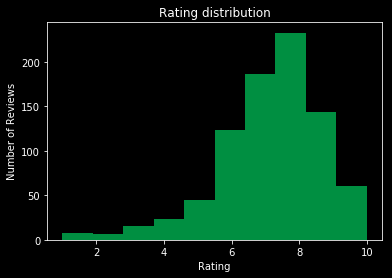

In [96]:
num_bins = 10

plt.hist(csv.rating, num_bins, facecolor=green)

plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

plt.show()

In [141]:
Counter(csv.rating)

Counter({8.5: 30,
         8.0: 170,
         5.0: 44,
         6.0: 108,
         4.5: 1,
         7.0: 159,
         7.5: 49,
         9.5: 5,
         9.0: 102,
         4.0: 22,
         2.0: 5,
         6.8: 1,
         8.9: 2,
         10.0: 53,
         8.6: 1,
         7.9: 3,
         5.94: 1,
         5.5: 11,
         7.75: 2,
         9.7: 2,
         3.0: 14,
         8.4: 1,
         6.5: 17,
         2.5: 2,
         6.1: 2,
         1.0: 8,
         7.8: 2,
         7.25: 3,
         7.4: 2,
         7.7: 1,
         6.9: 1,
         7.2: 2,
         8.8: 2,
         7.3: 2,
         6.75: 2,
         8.3: 2,
         8.2: 2,
         5.8: 1,
         6.3: 1,
         3.5: 1,
         8.1: 1,
         8.7: 1,
         9.1: 1,
         7.6: 1,
         8.35: 1,
         7.11: 1,
         4.7: 1,
         7.22: 1})

# Comment Column Analysis

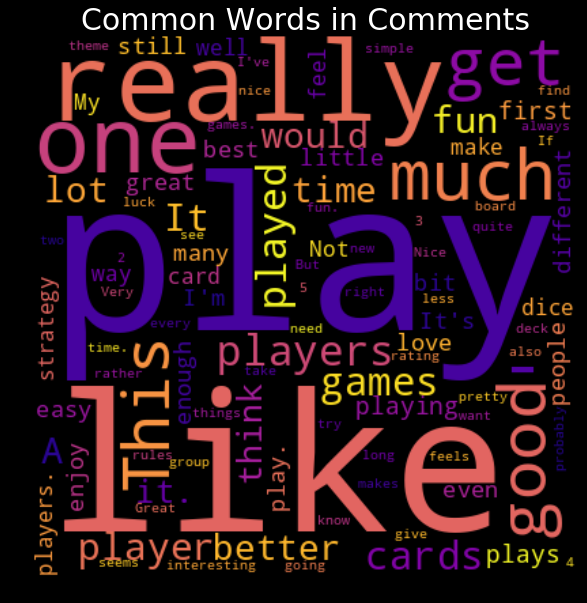

In [145]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
remove_words = ['game', 'game.', 'game,', 'I', 'it', '_', "I'd", 'The']
sw = set(stopwords.words('english') + remove_words)

words = Counter([w for w in " ".join(csv.comment).split() if w not in sw])

wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words in Comments', fontsize=30)
plt.axis('off');

Comment length mean:  227.81582054309328
Comment length min:   6
Comment length max:   7977


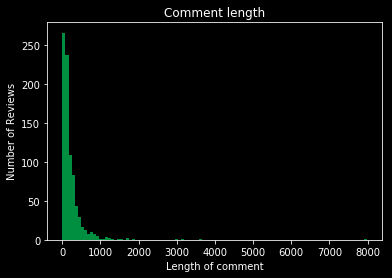

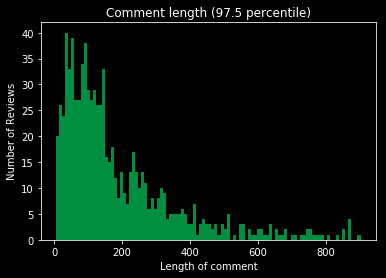

In [127]:
len_df = csv.comment.str.len()

print('Comment length mean: ', len_df.mean())
print('Comment length min:  ', len_df.min())
print('Comment length max:  ', len_df.max())

num_bins = 100

plt.hist(len_df, num_bins, facecolor=green)

plt.title('Comment length')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

upper_comment_bound = np.percentile(len_df, [0, 97.5])[1]

len_df = csv.comment.str.len()

plt.hist(len_df[len_df < upper_comment_bound].dropna(), num_bins, facecolor=green)

plt.title('Comment length (97.5 percentile)')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

# GameID Column Analysis

Review count mean:  2.630434782608696
Review count min:   1
Review count max:   16


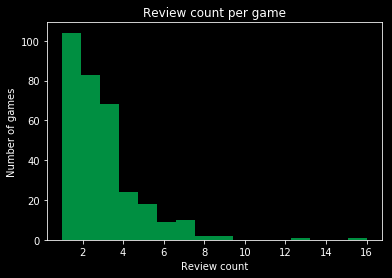

In [123]:
gameID_df = pd.DataFrame({'review_count': list(Counter(csv.gameID).values())})

print('Review count mean: ', gameID_df.review_count.mean())
print('Review count min:  ', gameID_df.review_count.min())
print('Review count max:  ', gameID_df.review_count.max())

plt.hist(gameID_df.review_count, gameID_df.review_count.max(), facecolor=green)
plt.title('Review count per game')
plt.xlabel('Review count')
plt.ylabel('Number of games')
plt.show()

# UserID Column Analysis

Review count mean:  1.0204819277108435
Review count min:   1
Review count max:   2


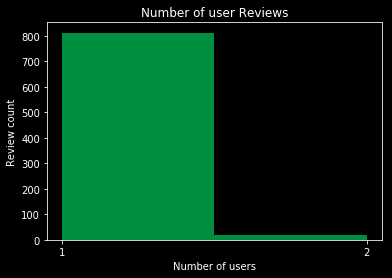

In [126]:
userID_df = pd.DataFrame({'review_count': list(Counter(csv.userID).values())})

print('Review count mean: ', userID_df.review_count.mean())
print('Review count min:  ', userID_df.review_count.min())
print('Review count max:  ', userID_df.review_count.max())

plt.hist(userID_df.review_count, userID_df.review_count.max(), facecolor=green)
plt.title('Number of user Reviews')
plt.xlabel('Number of users')
plt.xticks(range(userID_df.review_count.min(), userID_df.review_count.max() + 1))
plt.ylabel('Review count')
plt.show()